<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from matplotlib import pyplot

In [ ]:
data = pd.read_csv('/content/data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["weekday"] = df['date'].dt.weekday #extracting week day
    df["day"] = df['date'].dt.day # extracting day
    df["month"] = df['date'].dt.month # extracting day
    df["year"] = df['date'].dt.year # extracting day
    #df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df

df = date_process(data)

In [ ]:
df

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,weekday,day,month,year
0,8533875475515924645,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney,6,5,2,2017
1,4874599869430831185,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul,6,5,2,2017
2,361954421372951638,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow,6,5,2,2017
3,8751850432978942600,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset,6,5,2,2017
4,2451058030378352110,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset,6,5,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392887,4823772839168317708,1,2017-03-14,NaN,14,10.0,210.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Australia,Sydney,1,14,3,2017
392888,4495028198726387872,1,2017-03-14,NaN,15,13.0,306.0,NaN,NaN,m.facebook.com,Social,Android Webview,mobile,United States,not available in demo dataset,1,14,3,2017
392889,659863211325608630,1,2017-03-14,NaN,16,16.0,202.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Colombia,not available in demo dataset,1,14,3,2017
392890,5989424100079269693,1,2017-03-14,NaN,20,18.0,621.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Israel,Tel Aviv-Yafo,1,14,3,2017


In [ ]:
df1 = df[['date', 'transactions', 'transactionRevenue', 'weekday', 'day', 'month', 'year']]

In [ ]:
df1

,date,transactions,transactionRevenue,weekday,day,month,year
0,2017-02-05,NaN,NaN,6,5,2,2017
1,2017-02-05,NaN,NaN,6,5,2,2017
2,2017-02-05,NaN,NaN,6,5,2,2017
3,2017-02-05,NaN,NaN,6,5,2,2017
4,2017-02-05,NaN,NaN,6,5,2,2017
...,...,...,...,...,...,...,...
392887,2017-03-14,NaN,NaN,1,14,3,2017
392888,2017-03-14,NaN,NaN,1,14,3,2017
392889,2017-03-14,NaN,NaN,1,14,3,2017
392890,2017-03-14,NaN,NaN,1,14,3,2017


In [ ]:
df2 = df1.dropna()

In [ ]:
df2

,date,transactions,transactionRevenue,weekday,day,month,year
1083,2017-02-05,1.0,21.99,6,5,2,2017
1135,2017-02-05,1.0,75.78,6,5,2,2017
1155,2017-02-05,1.0,5.50,6,5,2,2017
1164,2017-02-05,1.0,63.99,6,5,2,2017
1169,2017-02-05,1.0,63.97,6,5,2,2017
...,...,...,...,...,...,...,...
392489,2017-03-14,1.0,85.08,1,14,3,2017
392492,2017-03-14,2.0,41.38,1,14,3,2017
392493,2017-03-14,1.0,236.99,1,14,3,2017
392496,2017-03-14,1.0,96.95,1,14,3,2017


In [ ]:
df2 = df2.groupby('month')['transactions'].sum().reset_index()

In [ ]:
df2

,month,transactions
0,1,713.0
1,2,733.0
2,3,993.0
3,4,959.0
4,5,1160.0
5,6,971.0


In [ ]:
df1[df1['month'] == 1].sum()

transactions          7.130000e+02
transactionRevenue    1.062482e+05
weekday               1.722630e+05
day                   1.063538e+06
month                 6.469400e+04
year                  1.304878e+08
dtype: float64

In [ ]:
df2['date'].min(), df2['date'].max()     

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-06-30 00:00:00'))

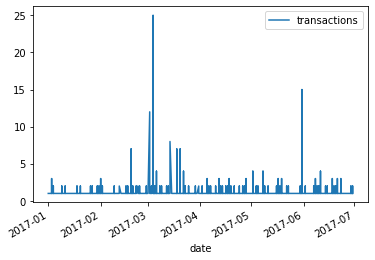

In [ ]:
df2.plot(x ='date', y='transactions', kind = 'line')

In [ ]:
df3 = df2.groupby('day')['transactions'].sum().reset_index()

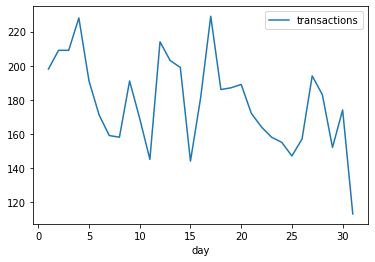

In [ ]:
df3.plot(x ='day', y='transactions', kind = 'line')

In [ ]:
df3 = df3.set_index('day')
df3.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='day')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(2).mean()
    
    
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    


    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

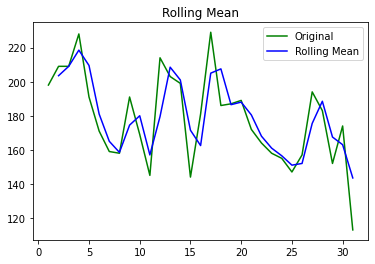

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.1408081097831135, 0.02367693660822073, 0, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, 200.62174704707974)
df_output: 
 Test Statistic                 -3.140808
p-value                         0.023677
#Lags Used                      0.000000
Number of Observations Used    30.000000
dtype: float64
Test Statistic                 -3.140808
p-value                         0.023677
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [ ]:
stationarity_check(df3.transactions)

In [ ]:
df3['Roll_Mean'] = df3.rolling(center=False, window=2).mean()

In [ ]:
df3

,transactions,Roll_Mean
day,,
1,198.0,NaN
2,209.0,203.5
3,209.0,209.0
4,228.0,218.5
5,191.0,209.5
6,171.0,181.0
7,159.0,165.0
8,158.0,158.5
9,191.0,174.5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


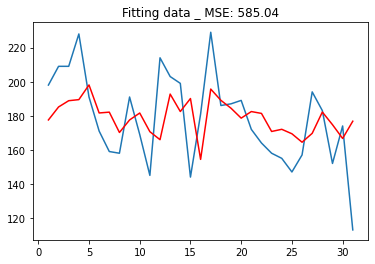

In [ ]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df3.transactions, order=(5,1,0))  
results_MA = model.fit()  
plt.plot(df3.transactions)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df3.transactions)**2).mean()))
plt.show()

                              ARMA Model Results                              
Dep. Variable:           transactions   No. Observations:                   31
Model:                     ARMA(5, 1)   Log Likelihood                -142.789
Method:                       css-mle   S.D. of innovations             24.046
Date:                Fri, 16 Apr 2021   AIC                            301.579
Time:                        15:13:15   BIC                            313.051
Sample:                             0   HQIC                           305.319
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                177.5309      7.818     22.709      0.000     162.208     192.853
ar.L1.transactions    -0.1627      0.410     -0.397      0.695      -0.967       0.641
ar.L2.transactions  

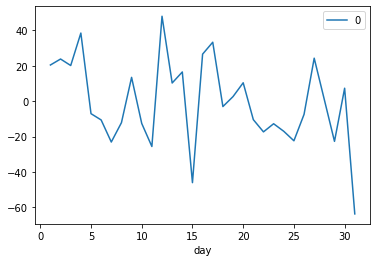

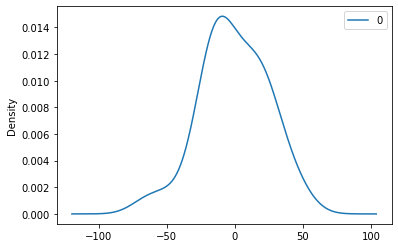

               0
count  31.000000
mean   -0.569205
std    24.580517
min   -63.790253
25%   -14.905959
50%    -3.048548
75%    18.348220
max    48.050953


In [ ]:
# summary of fit model
print(results_MA.summary())
# line plot of residuals
residuals = DataFrame(results_MA.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
predictions = results_MA.predict(1, 31)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
predictions

1     185.149990
2     188.826672
3     189.460488
4     198.067999
5     181.632117
6     182.112456
7     170.179309
8     177.530400
9     181.602694
10    170.644313
11    165.949047
12    192.715652
13    182.476888
14    190.102230
15    154.391068
16    195.651800
17    189.048548
18    184.402896
19    178.595128
20    182.453868
21    181.370249
22    170.767383
23    172.044534
24    169.418644
25    164.461999
26    169.679290
27    182.177466
28    174.741646
29    166.669405
30    176.790253
31    149.228454
dtype: float64

In [ ]:
predictions = results_MA.predict(31, 32)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


***Predictions for next day in the next month***

In [ ]:
predictions

31    149.228454
32    176.502068
dtype: float64

In [ ]:
X = df3.transactions
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
predictions

[]

****************************IN TERMS OF MONTHS****************************

In [ ]:
df3 = df2.groupby('month')['transactions'].sum().reset_index()

In [ ]:
df3

,month,transactions
0,1,713.0
1,2,733.0
2,3,993.0
3,4,959.0
4,5,1160.0
5,6,971.0


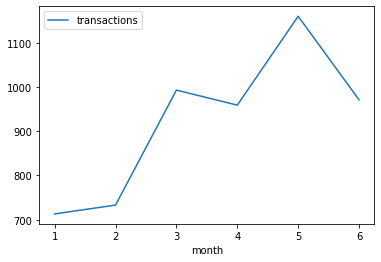

In [ ]:
df3.plot(x ='month', y='transactions', kind = 'line')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(2).mean()
    
    
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    


    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

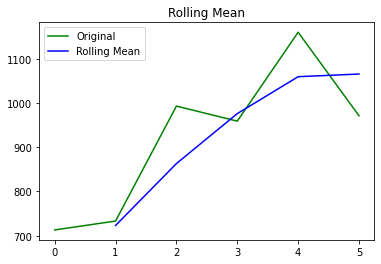

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-2.4685930482723095, 0.1233041565126079, 1, 4, {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325}, 45.95612439355797)
df_output: 
 Test Statistic                -2.468593
p-value                        0.123304
#Lags Used                     1.000000
Number of Observations Used    4.000000
dtype: float64
Test Statistic                -2.468593
p-value                        0.123304
#Lags Used                     1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [ ]:
stationarity_check(df3.transactions)

In [ ]:
df3

,month,transactions,Roll Mean
0,1,713.0,NaN
1,2,733.0,NaN
2,3,993.0,813.000000
3,4,959.0,895.000000
4,5,1160.0,1037.333333
5,6,971.0,1030.000000


In [ ]:
df3['Roll Mean'] = df3['transactions'].rolling(2).mean()

In [ ]:
df3

,month,transactions,Roll Mean
0,1,713.0,NaN
1,2,733.0,723.0
2,3,993.0,863.0
3,4,959.0,976.0
4,5,1160.0,1059.5
5,6,971.0,1065.5


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


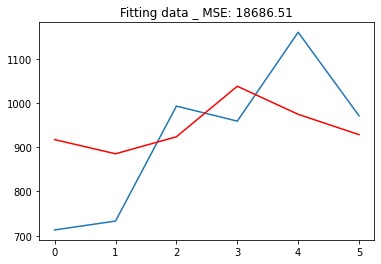

In [ ]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df3.transactions, order=(0,3, 2))  
results_MA = model.fit()  
plt.plot(df3.transactions)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df3.transactions)**2).mean()))
plt.show()

                              ARMA Model Results                              
Dep. Variable:           transactions   No. Observations:                    6
Model:                     ARMA(0, 3)   Log Likelihood                 -37.905
Method:                       css-mle   S.D. of innovations            101.849
Date:                Fri, 16 Apr 2021   AIC                             85.809
Time:                        16:31:28   BIC                             84.768
Sample:                             0   HQIC                            81.641
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                917.1633     45.417     20.194      0.002     828.147    1006.180
ma.L1.transactions     0.1775      1.109      0.160      0.888      -1.996       2.351
ma.L2.transactions  

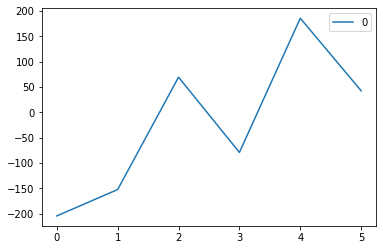

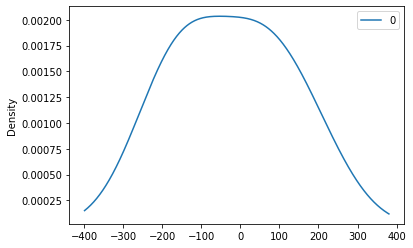

                0
count    6.000000
mean   -22.946370
std    147.621017
min   -204.163337
25%   -133.839328
50%    -18.149589
75%     62.679376
max    185.564504


In [ ]:
# summary of fit model
print(results_MA.summary())
# line plot of residuals
residuals = DataFrame(results_MA.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
predictions = results_MA.predict(0,5)
predictions

0     917.163337
1     885.154972
2     923.625239
3    1037.892399
4     974.435496
5     928.406779
dtype: float64

In [ ]:
predictions = results_MA.predict(5,6)
predictions

5    928.406779
6    970.683769
dtype: float64